- Bibliotecas

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

## EJERCICIO 1: Mostrar una imagen en ByN y a color.

In [2]:
input('Pulsa Intro para continuar con el ejercicio 1')

Pulsa Intro para continuar con el ejercicio 1 


''

- Función para mostrar por pantalla cualquier imagen con matplotlib

In [3]:
def plt_imshow(im, title = ''):
    if len(im.shape) == 3:
        im_plt = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        plt.imshow(im_plt)
    else:
        plt.imshow(im, cmap='gray')
    plt.title(title)
    plt.show()

- Función para la lectura de imágenes

In [4]:
def leer_imagen(path, color = None):
    im_cv = None # Inicialización de la imagen

    # Si queremos leer la imagen en BGR
    if color == None:
        im_cv = cv2.imread(path)
        
    # Si queremos leer la imagen en ByN
    elif color == 0:
        im_cv = cv2.imread(path, 0)

    # Comprobamos que hemos leído bien la imagen
    if im_cv.size == 0:
        sys.exit('Error al leer imagen')

    # Devolvemos la imagen para cv y para plt
    return im_cv

- Lectura de imágenes

In [5]:
# Directorio donde se encuentra la imagen
path = 'images/orapple.jpg'
# Lectura de la imagen en escala de grises
gris_cv = leer_imagen(path, 0)
# Lectura de la imagen a color
color_cv = leer_imagen(path)

- Mostramos las imágenes

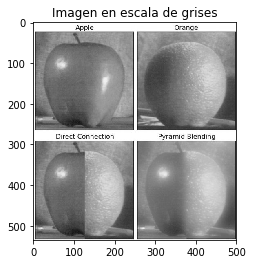

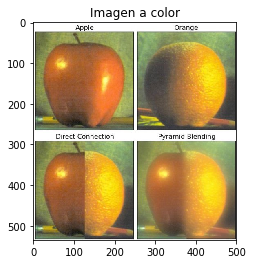

In [6]:
# El código que muestra las imágenes en OpenCV está comentado
# para que el código se ejecute sin problemas en Colab
"""
# Mostramos ambas imágenes en cv2
cv2.imshow('Imagen en escala de grises', gris_cv)
cv2.imshow('Imagen a color', color_cv)

# Esperamos a la pulsación de una tecla para cerrar ambas imágenes
print('Pulse una tecla para cerrar las imágenes')
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

#Mostramos ambas imágenes en plt
plt_imshow(gris_cv,'Imagen en escala de grises')

plt_imshow(color_cv,'Imagen a color')

## EJERCICIO 2: Mostrar una imagen monobanda y tribanda tras modificarla.

In [7]:
input('Pulsa Intro para continuar con el ejercicio 2')

Pulsa Intro para continuar con el ejercicio 2 


''

- Leemos la imagen.

In [8]:
# Directorio donde se encuentra la imagen
path = 'images/orapple.jpg'
# Seleccionamos el modo
modo = int(input('0: Monobanda\n1: Tribanda\n'))
# Inicializamos la imagen
imagen_cv = None
# Leemos la imagen
if modo:
    imagen_cv = leer_imagen(path)
else:
    imagen_cv = leer_imagen(path, modo)

0: Monobanda
1: Tribanda
 1


- Modificamos la imagen: raíz cuadrada --> disminuye intensidad

In [9]:
imagen_cv = imagen_cv**(1/2)

- Comprobamos el número de canales de la imagen.

In [10]:
# Vemos si la imagen tiene 3 canales o solo 1
m_o_t = len(imagen_cv.shape)
color = False

# Si el tamaño es 2 la imagen está en ByN
# SI el tamaño es 3 la imagen está a color
if m_o_t == 3:
    color = True

- Normalizamos la imagen

~~~
X_norm = (X - X_min) / (X_max - X_min)
~~~

In [11]:
# SI es a color normalizamos cada canal por separado
if color:
    # Normalizado de la imagen
    imagen_cv[:,:,0] = (imagen_cv[:,:,0] - np.min(imagen_cv[:,:,0])) / (np.max(imagen_cv[:,:,0]) - np.min(imagen_cv[:,:,0]))*255
    imagen_cv[:,:,1] = (imagen_cv[:,:,1] - np.min(imagen_cv[:,:,1])) / (np.max(imagen_cv[:,:,1]) - np.min(imagen_cv[:,:,1]))*255
    imagen_cv[:,:,2] = (imagen_cv[:,:,2] - np.min(imagen_cv[:,:,2])) / (np.max(imagen_cv[:,:,2]) - np.min(imagen_cv[:,:,2]))*255
    
# SI es en ByN normalizamos la imagen entera (solo tiene un canal)
else:
    # Normalizado de la imagen
    imagen_cv[:,:] = (imagen_cv[:,:] - np.min(imagen_cv[:,:])) / (np.max(imagen_cv[:,:]) - np.min(imagen_cv[:,:]))*255

- Pasamos la imagen a enteros sin signo y la mostramos

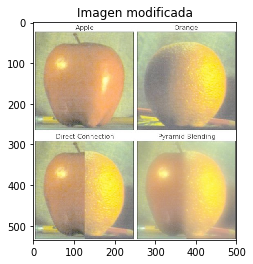

In [12]:
imagen_cv = np.uint8(imagen_cv)

# El código que muestra las imágenes en OpenCV está comentado
# para que el código se ejecute sin problemas en Colab
"""
cv2.imshow('Imagen modificada',imagen_cv)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""

plt_imshow(imagen_cv, 'Imagen modificada')

## EJERCICIO 3: Mostrar varias imágenes a la vez

In [13]:
input('Pulsa Intro para continuar con el ejercicio 3')

Pulsa Intro para continuar con el ejercicio 3 


''

- Función que recive como argumento una lista de imágenes y las muestra con OpenCV

In [14]:
def pintaMI_cv(vim):
    # Vamos a guardar los tamaños de las imágenes
    long_x = []
    long_y = []
    
    # Recorremos cada imagen guardando su tamaño
    for im in vim:
        long_x.append(im.shape[0])
        long_y.append(im.shape[1])
    
    # Convertimos en array
    long_x = np.asarray(long_x)
    long_y = np.asarray(long_y)
    
    # Obtenemos la longitud máxima de cada eje
    max_x = np.max(long_x)
    max_y = np.max(long_y)
    
    # Creamos una lista con las imágenes que vamos a concatenar
    imagenes = []
    
    # Recorremos el vector de imágenes pasado como parámetro
    for i in range(vim.shape[0]):
        # Inicializamos la imagen genérica
        im = None
        
        # Para las imágenes con 3 canales
        if len(vim[i].shape) == 3:
            # Creamos la imagen genérica de color blanco
            im = np.ones((max_x, max_y, 3))*255
            im = np.uint8(im)
            
            # Copiamos la imagen original sobre el fondo blanco
            for l in range(vim[i].shape[0]):
                for j in range(vim[i].shape[1]):
                    for k in range(vim[i].shape[2]):
                        im[l,j,k] = vim[i][l,j,k]
        else:
            # Creamos la imagen genérica de color blanco
            im = np.ones((max_x, max_y))*255
            im = np.uint8(im)
            
            # Copiamos la imagen original sobre el fondo blanco
            for l in range(vim[i].shape[0]):
                for j in range(vim[i].shape[1]):
                        im[l,j] = vim[i][l,j]
    
        # Guardamos la imagen sobre fondo blanco
        imagenes.append(im)

    # Concatenamos dos pares en orizontal y el resultado en vertical
    im = np.concatenate((imagenes[0], imagenes[1]), axis=1)
    im2 = np.concatenate((imagenes[2], imagenes[3]), axis=1)
    im3 = np.concatenate((im, im2), axis=0)        
        
    # Cerramos las imágenes
    cv2.imshow('',im3)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

- Función que recive como argumento una lista de imágenes y las muestra con Matplotlib

In [15]:
def pintaMI_plt(vim):
    # Recorremos el vector
    for i in range(vim.shape[0]):
        plt.subplot(2,2,i+1)
        # Mostramos cada imagen
        if len(vim[i].shape) == 3:
            im_plt = cv2.cvtColor(vim[i],cv2.COLOR_BGR2RGB)
            plt.imshow(im_plt)
        else:
            plt.imshow(vim[i], cmap='gray')
    plt.show()

- Leemos las imágenes

In [16]:
path1 = 'images/orapple.jpg'
path2 = 'images/messi.jpg'
path3 = 'images/logoOpenCV.jpg'
path4 = 'images/dave.jpg'

imagen_cv1 = leer_imagen(path1)
imagen_cv2 = leer_imagen(path2)
imagen_cv3 = leer_imagen(path3)
imagen_cv4 = leer_imagen(path4)

- Creamos las listas de imágenes; una para OpenCV y otra para Matplotlib

In [17]:
vim_cv=[]

- Insertamos las imágenes en las listas y las convertimos en vectores

In [18]:
# Imágenes
vim_cv.append(imagen_cv1)
vim_cv.append(imagen_cv2)
vim_cv.append(imagen_cv3)
vim_cv.append(imagen_cv4)

# Transformación en vector
vim_cv = np.asarray(vim_cv)

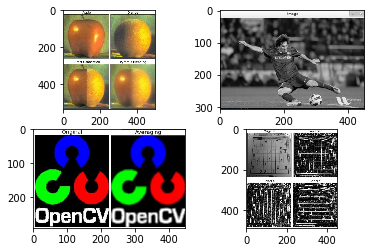

In [19]:
# El código que muestra las imágenes en OpenCV está comentado
# para que el código se ejecute sin problemas en Colab

pintaMI_plt(vim_cv)
# pintaMI_cv(vim_cv)

Si las imágenes no son todas del mismo tipo tendremos problemas al mostrarlas con la biblioteca matplotlib ya que para cada una de ellas deberíamos especificar un valor de 'cmap' diferente. Por ejemplo: si queremos mostrar una imagen en escala de grises y las demás a color, deberíamos fijar el valor de 'cmap' a 'gray' para tan solo la imagen indicada mientras que para el resto sería el valor por defecto. Para ello podríamos comprobar en número de canales de la imagen y mostrarla según esto: 1 canal --> en escala de grises, 3 canales --> a color. Para hacerlo a gusto del usuario podríamos aceptar como parámetro una lista de duplas <imagen, cmap> para mostrarlo adecuadamente.

En cambio, en OpenCV nos encontramos el problema de que solo podemos mostrar una imagen por ventana, de modo que debemos crear una sola imagen que contenga a las demás para poder mostrarlas todas juntas, es decir, debemos concatenarlas. Para ello todas las imágenes deben tener el mismo tamaño. En vez de redimensionar la matriz original de la imagen (lo cual la deforma y la deja irreconocible) he optado por calcular el eje X e Y más largo de todas las imágenes y crear una imagen genérica blanca de manera que cualquier imagen original es igual o menor que ella. A continuación copiaremos una a una las imágenes pasadas como parámetro encima de una imagen genérica teniendo como resultado 4 imágenes del mismo tamaño que muestran las originales sobre fondo blanco. Estas nuevas imágenes sí se pueden concatenar y mostrar con OpenCV.

## EJETCICIO 4: Modificar el color de una lista de píxeles de una imagen.

In [20]:
input('Pulsa Intro para continuar con el ejercicio 4')

Pulsa Intro para continuar con el ejercicio 4 


''

- Función para cambiar de color un pixel

In [21]:
# Pasamos la imagen a modificar, la posición del píxel, y el color a poner.
def color_change(im, fil, col, r, g, b):
    color = np.array([b,g,r])
    if len(im.shape) == 3:
        im[fil, col] = color

- Función para cambiar el color de una lista de píxeles

In [22]:
# Pasamos la imagen a modificar, la lista de píxeles, y el color a poner.
def v_color_change(im, lista, r, g, b):
    color = np.array([b,g,r])
    if len(im.shape) == 3:
        for p in lista:
            im[p[0], p[1]] = color

In [23]:
# Creamos una lista de píxeles aleatorios
lista = []
for i in range(20000):
    a = np.random.randint(0, 535)
    b = np.random.randint(0, 500)
    c = [a,b]
    lista.append(c)


In [24]:
# La imagen 'imagen_cv1' es orapple.jpg que ya ha sido leida en el ejercicio 3.

# Vamos a colorear de azul un cuadrado de la imagen
for i in range(150,201):
    for j in range(350,401):
        color_change(imagen_cv1, i, j, 0,0,255)

# La lista de píxeles aleatorios la colorearemos de verde
v_color_change(imagen_cv1, lista, 0,255,0)

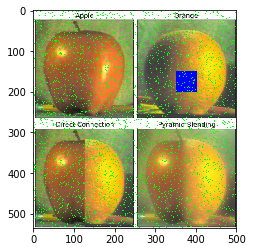

In [25]:
# Mostramos la imagen modificada
plt_imshow(imagen_cv1)

## EJERCICIO 5: Múltiples imágenes en una misma ventana con títulos individuales

In [26]:
input('Pulsa Intro para continuar con el ejercicio 5')

Pulsa Intro para continuar con el ejercicio 5 


''

- Función para imprimir imágenes con títulos individuales

In [27]:
def title_pintaMI_plt(vim, titles = None):
    # Recorremos el vector
    for i in range(vim.shape[0]):
        plt.subplot(2,2,i+1)
        if titles == None:
            plt.title('Imagen #'+str(i))
        else:
            plt.title(titles[i])
        # Mostramos cada imagen
        if len(vim[i].shape) == 3:
            im_plt = cv2.cvtColor(vim[i],cv2.COLOR_BGR2RGB)
            plt.imshow(im_plt)
        else:
            plt.imshow(vim[i], cmap='gray')
    plt.show()

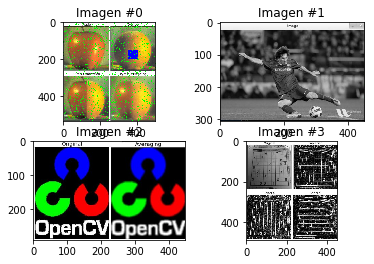

In [28]:
title_pintaMI_plt(vim_cv)